In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [13]:
# Load the CSV file
df = pd.read_csv("data\dataset.csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aazar\AppData\Local\Temp\ipykernel_38260\3063434971.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("data\dataset.csv")


,Month,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Jan,91123,60900,65466,78535,95447,55463,71908,97965,81577,71787
1,Feb,91725,79819,59968,63536,83595,72808,59701,69877,78375,65983
2,Mar,98222,69235,76359,89253,56577,52593,56061,95159,53358,61442
3,Apr,77861,71356,81864,85223,54878,96374,69072,73709,95886,94724
4,May,66357,59155,61667,96410,60253,68552,59202,77279,59403,66251
5,Jun,94900,83757,83607,90654,75402,66393,76725,53108,69057,88913
6,Jul,53396,81322,73950,57147,84673,76666,83740,85494,94129,90317
7,Aug,87273,96105,85697,61531,79434,55133,92897,91980,74590,54944
8,Sep,60937,83838,59342,72717,65973,55834,62689,84565,74758,61652
9,Oct,82167,83719,63674,83836,84582,52291,88271,79345,63655,87635


In [14]:
# Transpose data to get years as rows and months as columns
df_t = df.set_index("Month").T
df_t.index.name = "Year"
df_t.reset_index(inplace=True)
df_t["Year"] = df_t["Year"].astype(int)

In [15]:
# Prepare input (X) and predictions dictionary
X = df_t["Year"].values.reshape(-1, 1)
month_columns = df_t.columns[1:]  # All months

In [16]:
# Store predictions for each month
predictions_2025 = {}

In [17]:
# Train and predict using linear regression for each month
for month in month_columns:
    y = df_t[month].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred_2025 = model.predict([[2025]])
    predictions_2025[month] = int(y_pred_2025[0])

In [18]:
# Convert predictions to DataFrame
predicted_df = pd.DataFrame(list(predictions_2025.items()), columns=["Month", "Predicted Sales 2025"])

# Define the correct month order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Apply categorical ordering and sort
predicted_df["Month"] = pd.Categorical(predicted_df["Month"], categories=month_order, ordered=True)
predicted_df = predicted_df.sort_values("Month")

# Display predicted values
print(predicted_df)

   Month  Predicted Sales 2025
0    Jan                 79461
1    Feb                 65387
2    Mar                 55768
3    Apr                 89286
4    May                 66636
5    Jun                 66249
6    Jul                 96464
7    Aug                 66613
8    Sep                 69189
9    Oct                 75855
10   Nov                 71891
11   Dec                 88383


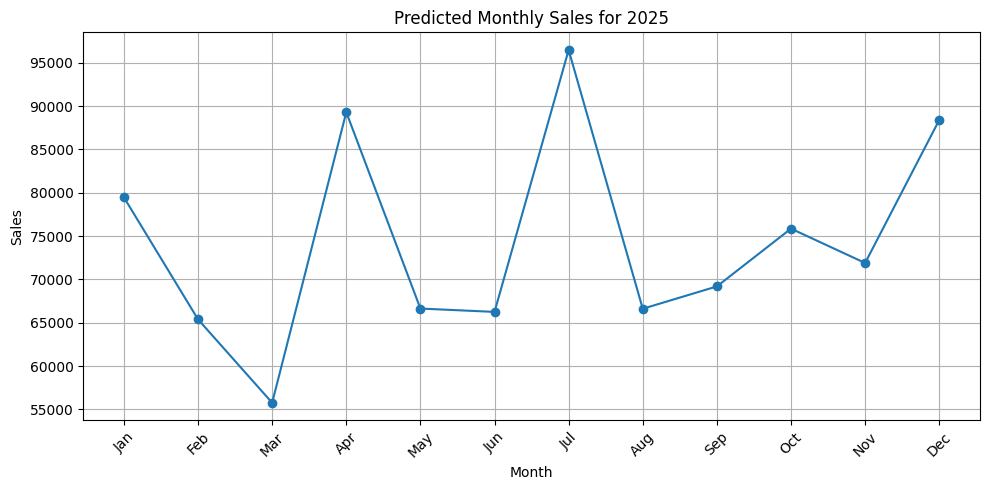

In [19]:
# Plot the predictions
plt.figure(figsize=(10, 5))
plt.plot(predicted_df["Month"], predicted_df["Predicted Sales 2025"], marker='o')
plt.title("Predicted Monthly Sales for 2025")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()